In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('datasets/cars.csv')

data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
data.shape

(261, 8)

In [4]:
#frac=1 preservs all of the datapoints
data = data.sample(frac=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 136 to 33
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [6]:
data.columns = data.columns.str.lstrip()

In [7]:
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [9]:
# errors = coerce set all the invalid values to NAN
data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors = 'coerce')
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors = 'coerce')

In [10]:
data.dropna(inplace = True)

In [11]:
data.shape

(256, 8)

In [13]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['brand'] = labelEncoder.fit_transform(data['brand'].astype(str))

data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
136,26.0,4,91.0,70,1955.0,21,1972,2
171,20.3,5,131.0,103,2830.0,16,1979,0
118,34.4,4,98.0,65,2045.0,16,1982,2
69,17.5,8,305.0,145,3880.0,13,1978,2
97,18.0,6,250.0,88,3139.0,15,1972,2


In [14]:
data_x = pd.DataFrame(data, columns=['mpg', 'cubicinches', 'cylinders', 'hp'])

label_y = data['brand']

Text(0, 0.5, 'Weight')

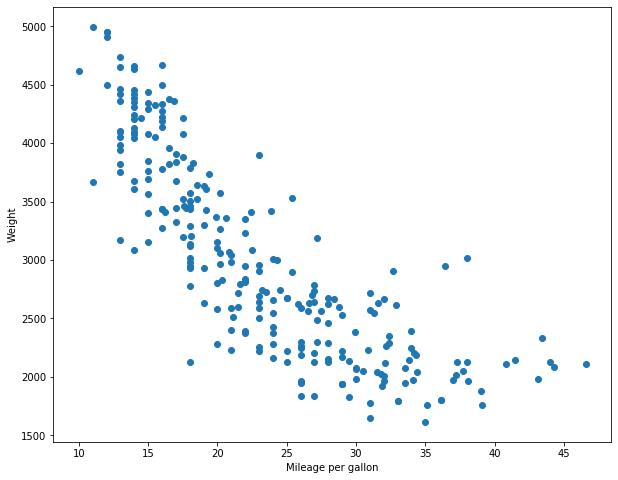

In [16]:
plt.figure(figsize=(10,8))

plt.scatter(data['mpg'], data['weightlbs'])

plt.xlabel('Mileage per gallon')
plt.ylabel('Weight')

In [17]:
from sklearn.cluster import KMeans

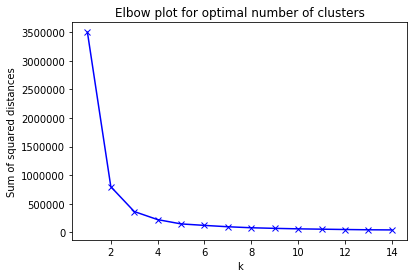

In [19]:
sum_of_squared_distances=[]

K = range(1,15)

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(data_x)
    
    sum_of_squared_distances.append(k_means.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')

plt.title('Elbow plot for optimal number of clusters')

plt.show()

In [20]:
k_means = KMeans(n_clusters=3)
k_means=k_means.fit(data_x)

In [21]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_x, k_means.labels_)

print("Score = ", score)

Score =  0.6323149311159748


In [22]:
from sklearn.metrics import homogeneity_score

hmg_score = homogeneity_score(label_y, k_means.labels_)

print("Homogeneity score = ", hmg_score)

Homogeneity score =  0.31550036277564175


In [23]:
from sklearn.metrics import v_measure_score

vm_score = v_measure_score(label_y, k_means.labels_)

print("V Measure score = ", vm_score)

V Measure score =  0.3003375614022765


In [25]:
from sklearn.metrics import completeness_score

comp_score = completeness_score(label_y, k_means.labels_)

print("Completeness score = ", comp_score)

Completeness score =  0.28656536273532296


In [26]:
from sklearn.metrics import adjusted_rand_score

adjr_score = adjusted_rand_score(label_y, k_means.labels_)

print("Adjusted_rand score = ", adjr_score)

Adjusted_rand score =  0.11281925794858025


In [29]:
from sklearn.metrics import adjusted_mutual_info_score

adj_mutual = adjusted_mutual_info_score(label_y, k_means.labels_, average_method = 'arithmetic')

print("Adjusted_rand score = ", adj_mutual)

Adjusted_rand score =  0.2945981842532958
